In [5]:
!pip install matplotlib

In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
## Generate Random World Cities
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

740


# We will need to do the following PSEUDOCODE

### Import our dependencies and initialize counters and an empty list that will hold the weather data.
### Loop through the cities list.
### Group the cities in sets of 50 to log the process as we find the weather data for each city.
### Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
### Build the city_url or endpoint for each city.
### Log the URL and the record and set numbers.
### Make an API request for each city.
### Parse the JSON weather data for the following:
### City, country, and date
### Latitude and longitude
### Maximum temperature
### Humidity
### Cloudiness
### Wind speed
### Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [11]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [36]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [37]:
query_url = url + "appid=" + "&q" + city + "d3437785ee7480186a2edfa50ee6c8f4" 

In [15]:
# # weather_response = requests.get(query_url)
# weather_json = weather_response.json()

In [38]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | saint-augustin
Processing Record 3 of Set 1 | lolua
City not found. Skipping...
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | barranca
Processing Record 6 of Set 1 | ruwi
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | evanston
Processing Record 11 of Set 1 | luoyang
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | hudson bay
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | barbar
City not found. Skipping...
Processing Record 19 of Set 1 | severobaykalsk
Processing Record 20 of Set 1 | lazarev
Processing Record 21 of Set 1 | zhigans

Processing Record 38 of Set 4 | tabou
Processing Record 39 of Set 4 | verkhnyaya inta
Processing Record 40 of Set 4 | hofn
Processing Record 41 of Set 4 | manaure
Processing Record 42 of Set 4 | sangar
Processing Record 43 of Set 4 | russas
Processing Record 44 of Set 4 | hvammstangi
City not found. Skipping...
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | imeni babushkina
Processing Record 47 of Set 4 | talaya
Processing Record 48 of Set 4 | shenjiamen
Processing Record 49 of Set 4 | taltal
Processing Record 50 of Set 4 | bud
Processing Record 1 of Set 5 | predivinsk
Processing Record 2 of Set 5 | berlevag
Processing Record 3 of Set 5 | cangucu
Processing Record 4 of Set 5 | tukrah
Processing Record 5 of Set 5 | killybegs
Processing Record 6 of Set 5 | vao
Processing Record 7 of Set 5 | nombre de dios
Processing Record 8 of Set 5 | anyang
Processing Record 9 of Set 5 | warqla
City not found. Skipping...
Processing Record 10 of Set 5 | guerrero negro
Pro

Processing Record 27 of Set 8 | san patricio
Processing Record 28 of Set 8 | yantal
Processing Record 29 of Set 8 | kjollefjord
Processing Record 30 of Set 8 | barawe
City not found. Skipping...
Processing Record 31 of Set 8 | maues
Processing Record 32 of Set 8 | half moon bay
Processing Record 33 of Set 8 | auki
Processing Record 34 of Set 8 | lorengau
Processing Record 35 of Set 8 | slave lake
Processing Record 36 of Set 8 | erdenet
Processing Record 37 of Set 8 | westport
Processing Record 38 of Set 8 | myre
Processing Record 39 of Set 8 | sao jose da coroa grande
Processing Record 40 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 41 of Set 8 | inveraray
City not found. Skipping...
Processing Record 42 of Set 8 | guadalajara
Processing Record 43 of Set 8 | ixtapa
Processing Record 44 of Set 8 | padang
Processing Record 45 of Set 8 | broome
Processing Record 46 of Set 8 | longonjo
Processing Record 47 of Set 8 | galgani
City not found. Skipping...
Processing Rec

Processing Record 8 of Set 12 | chingirlau
Processing Record 9 of Set 12 | aykhal
Processing Record 10 of Set 12 | bambanglipuro
Processing Record 11 of Set 12 | acapulco
Processing Record 12 of Set 12 | kantunilkin
Processing Record 13 of Set 12 | alindao
Processing Record 14 of Set 12 | hambantota
Processing Record 15 of Set 12 | clarence town
Processing Record 16 of Set 12 | terrak
Processing Record 17 of Set 12 | lagos
Processing Record 18 of Set 12 | mecca
Processing Record 19 of Set 12 | narsaq
Processing Record 20 of Set 12 | matara
Processing Record 21 of Set 12 | penzance
Processing Record 22 of Set 12 | kryve ozero
Processing Record 23 of Set 12 | bonthe
Processing Record 24 of Set 12 | gao
Processing Record 25 of Set 12 | port moresby
Processing Record 26 of Set 12 | nemuro
Processing Record 27 of Set 12 | caravelas
Processing Record 28 of Set 12 | adzhamka
Processing Record 29 of Set 12 | gilleleje
Processing Record 30 of Set 12 | tidore
City not found. Skipping...
Processi

### Create a DataFrame of City Weather Data. 
#### Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file.

##### Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries)

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,61.00,57,95,1.72,NZ,2020-10-22 06:22:53
1,Saint-Augustin,51.23,-58.65,38.73,95,100,15.28,CA,2020-10-22 06:22:53
2,Barranca,-10.75,-77.77,60.91,90,72,5.28,PE,2020-10-22 06:22:53
3,Ruwi,23.60,58.55,89.60,15,2,3.36,OM,2020-10-22 06:22:53
4,Cidreira,-30.18,-50.21,65.34,88,100,17.96,BR,2020-10-22 06:22:54
5,Avarua,-21.21,-159.78,73.40,88,100,3.36,CK,2020-10-22 06:22:54
6,Torbay,47.67,-52.73,50.00,100,90,9.17,CA,2020-10-22 06:22:54
7,Evanston,42.04,-87.69,50.00,87,90,8.05,US,2020-10-22 06:22:54
8,Luoyang,34.68,112.45,78.01,99,0,2.39,CN,2020-10-22 06:22:54
9,Rikitea,-23.12,-134.97,74.07,73,81,2.55,PF,2020-10-22 06:22:54


### Format the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
#### Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear: new_column_order = ["column2", "column4", "column1"]; Then, we assign a new or the same DataFrame with new column order: 
### df = df[new_column_order]

In [41]:
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp",'Humidity',"Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-10-22 06:22:53,-46.19,168.86,61.00,57,95,1.72
1,Saint-Augustin,CA,2020-10-22 06:22:53,51.23,-58.65,38.73,95,100,15.28
2,Barranca,PE,2020-10-22 06:22:53,-10.75,-77.77,60.91,90,72,5.28
3,Ruwi,OM,2020-10-22 06:22:53,23.60,58.55,89.60,15,2,3.36
4,Cidreira,BR,2020-10-22 06:22:54,-30.18,-50.21,65.34,88,100,17.96
5,Avarua,CK,2020-10-22 06:22:54,-21.21,-159.78,73.40,88,100,3.36
6,Torbay,CA,2020-10-22 06:22:54,47.67,-52.73,50.00,100,90,9.17
7,Evanston,US,2020-10-22 06:22:54,42.04,-87.69,50.00,87,90,8.05
8,Luoyang,CN,2020-10-22 06:22:54,34.68,112.45,78.01,99,0,2.39
9,Rikitea,PF,2020-10-22 06:22:54,-23.12,-134.97,74.07,73,81,2.55


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs. Temperature
### Recall that to create a scatter plot, we collect then add x- and y-axis data to plt.scatter().

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [44]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# # File to Load
# city_data_to_load = "weather_data/city_data.csv"
# # ride_data_to_load = "weather_data/ride_data.csv"

# # Read the City and Ride Data
# city_data_df = pd.read_csv(city_data_to_load)
# # ride_data_df = pd.read_csv(ride_data_to_load)

In [45]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/22/20'

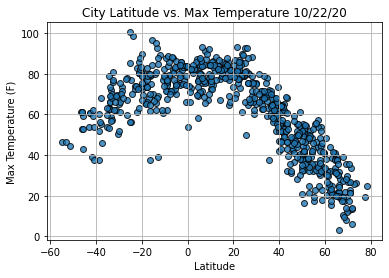

In [46]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

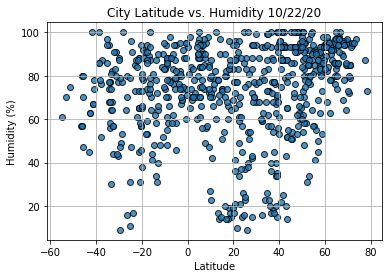

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

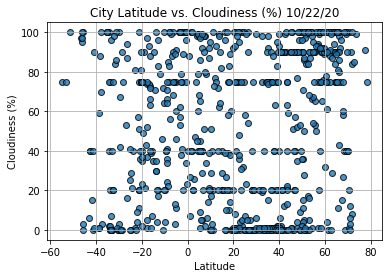

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

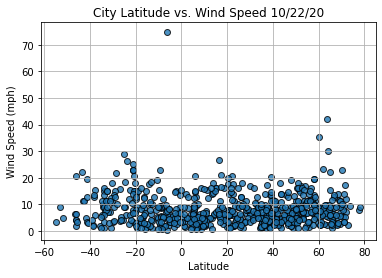

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [50]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Use Linear Regression to Find the Relationship Between Variables


In [51]:
index13 = city_data_df.loc[13]
index13

City               Saint-Philippe
Country                        RE
Date          2020-10-22 06:22:55
Lat                        -21.36
Lng                         55.77
Max Temp                     80.6
Humidity                       65
Cloudiness                     20
Wind Speed                  23.04
Name: 13, dtype: object

In [52]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
673     True
674     True
675     True
676     True
677    False
Name: Lat, Length: 678, dtype: bool

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-10-22 06:22:53,-46.19,168.86,61.00,57,95,1.72
1,Saint-Augustin,CA,2020-10-22 06:22:53,51.23,-58.65,38.73,95,100,15.28
2,Barranca,PE,2020-10-22 06:22:53,-10.75,-77.77,60.91,90,72,5.28
3,Ruwi,OM,2020-10-22 06:22:53,23.60,58.55,89.60,15,2,3.36
4,Cidreira,BR,2020-10-22 06:22:54,-30.18,-50.21,65.34,88,100,17.96


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Northern Hemisphere \n
                    for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-55-7e7639d0ce84>, line 6)

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

## Find the Correlation Between Latitude and Percent Humidity

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

## Find the Correlation Between Latitude and Percent Cloudiness

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n
                   for % Cloudiness', '% Cloudiness',(10,55))

## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

## Find the Correlation Between Latitude and Wind Speed

In [ ]:
## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

## Create Heatmaps for Weather Parameters

In [ ]:
## Create a Percent Humidity Heatmap
